# Automobile

We are interested in predicting car price using some factors. The dataset is from:

Jeffrey C. Schlimmer. (1987). UCI Machine Learning Repository [ https://archive.ics.uci.edu/ml/datasets/automobile ]. University of California, Irvine, School of Information and Computer Sciences.

## 1. Importing dataset

In [1]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df = pd.read_csv(url, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [2]:
df.shape

(205, 26)

The dataset contains 205 observations and 26 different variables. Note that there is no headers in above table. We need to add headers.

In [3]:
headers = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location",
           "wheel-base", "length","width", "height","curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke",
           "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]

df.columns = headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
df.describe(include = "all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [5]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

## 2. Data cleaning

Note that there are question marks "?" and missing values "NaN". We first replace "?" by "NaN".

In [6]:
import numpy as np

df.replace("?", np.nan, inplace = True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### 2.1 Identify all missing values

In [7]:
L1 = df.columns.values.tolist() # A list of columns from df.

L = [] # A list of counts for each column containing "NaN".
for column in L1:
    L2 = df[column].values.tolist() # A list of elements from the column.
    L.append(L2.count(np.nan))

S = [x for x in L if x != 0] # A list of counts only containing "NaN".

Index = [i for i in range(len(L)) if L[i] != 0]
L1_ = [L1[i] for i in Index] # A list of columns from L1 containing "NaN".

df_missing = pd.DataFrame({'Columns':L1_, 'Missing #':S})
df_missing

# We can check above by using the following method:
# df_NaN = df.isnull() # Output a boolean value; True for NaN, otherwise False.
# df_NaN.head()
# for column in L1:
    #print(df_NaN[column].value_counts())
    #print("")

,Columns,Missing #
0,normalized-losses,41
1,num-of-doors,2
2,bore,4
3,stroke,4
4,horsepower,2
5,peak-rpm,2
6,price,4


In [8]:
print("There are", sum(S), "missing values.")

There are 59 missing values.


### 2.2 Imputation

#### 2.2.1 Listwise deletion

Since the information of the price cannot be empty, we drop the 4 observations with "NaN" in "price". However, we do not delete the other observations that contains "NaN", because it does not satisfy the requirements of listwise deletion, such as randomly missing (e.g., the first 3 "NaN" in "normalized-losses" column) and no effect on the sample size (e.g., the total size 205 reduced to 146=205-59).

In [9]:
df.dropna(subset=["price"], axis=0, inplace = True)
df.reset_index(drop = True, inplace = True) # Reset index, because we droped two rows.

#### 2.2.2 Mean substitution

We replace "NaN" in columns "normalized-losses", "stroke", "bore", "horsepower" and "peak-rpm" by the corresponding mean. Note that variables "normalized-losses", "stroke", "bore", "horsepower", "peak-rpm" are not numerical.

In [10]:
avg_1 = df["normalized-losses"].astype("float").mean(axis = 0)
df["normalized-losses"].replace(np.nan, avg_1, inplace = True)
avg_2 = df["stroke"].astype(float).mean(axis=0)
df["stroke"].replace(np.nan, avg_2, inplace=True)
avg_3 = df["bore"].astype(float).mean(axis=0)
df["bore"].replace(np.nan, avg_3, inplace=True)
avg_4=df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, avg_4, inplace= True)
avg_5=df['peak-rpm'].astype('float').mean(axis=0)
df['peak-rpm'].replace(np.nan, avg_5, inplace= True)

#### 2.2.3 Hot-deck imputation

One imputes a value from a randomly selected similar record. Note that "num-of-doors" column contains only two categories, "four" and "two", where "four" is most frequent (84%). Thus, we replace "NaN" by "four".

In [11]:
df['num-of-doors'].value_counts()
df["num-of-doors"].replace(np.nan, "four", inplace = True)

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### 2.3 Correcting data format

In [12]:
df[["bore", "stroke", "horsepower", "peak-rpm", "price"]] = df[["bore", "stroke", "horsepower", 
                                                                "peak-rpm", "price"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")

df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

## 3. Feature selection

We need to select relevant features to produce a good model. In this case, we need to select good predictors for the car price; in particular, a potential predictor should have a strong relationship with the price. The method *stepwise regression*, that is a procedure of finding predictive variables for our model, will be applied, where we use both *forward selection* and *backward elimination* approaches. 

Note that there are two types of a variable, which are numerical and categorical. We discuss the cases separately.

### 3.1 Numerical variables

Calculate *Pearson correlation coefficient (PCC)* to measure the linear correlation between each variable and the target variable "price". The return values 1 and -1 means strong linear correlation, 0 means no linear correlation. Thus, we select a variable as a good predictor when its PCC is closed to 1 or -1. 

In [13]:
df.corr() 

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.139896,-0.007992,-0.182196,0.075790,0.279719,-0.035527,0.036233,-0.082391
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029800,0.055127,-0.114713,0.217300,0.239544,-0.225016,-0.181877,0.133999
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493203,0.157964,0.250313,0.371250,-0.360233,-0.470606,-0.543304,0.584642
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608941,0.123913,0.159733,0.579731,-0.286035,-0.665192,-0.698142,0.690628
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544879,0.188814,0.189867,0.615006,-0.245852,-0.633531,-0.680635,0.751265
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180327,-0.060822,0.259737,-0.086941,-0.309913,-0.049800,-0.104812,0.135486
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644041,0.167412,0.156433,0.757994,-0.279350,-0.749543,-0.794889,0.834415
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572516,0.205806,0.028889,0.822649,-0.256753,-0.650546,-0.679571,0.872335
bore,-0.139896,-0.029800,0.493203,0.608941,0.544879,0.180327,0.644041,0.572516,1.000000,-0.055390,0.001250,0.566838,-0.267338,-0.582121,-0.591390,0.543154
stroke,-0.007992,0.055127,0.157964,0.123913,0.188814,-0.060822,0.167412,0.205806,-0.055390,1.000000,0.187854,0.097815,-0.063720,-0.034079,-0.034741,0.082267


Let N = {"wheel-base", "length", "width", "curb-weight", "engine-size", "bore", "horsepower", "city-mpg", "highway-mpg"}. By the last row of the previous table, each one in N is numerical and PCC is either >0.5 or <-0.5.

We can verify these correlations by regression visualization. For example, analyze the relationship between "horsepower" and "price" as follows.

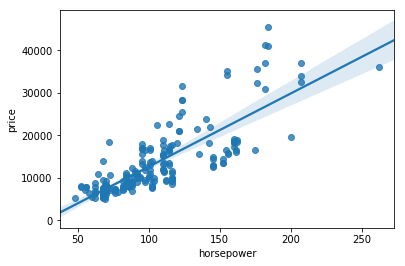

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

sns.regplot(x="horsepower", y="price", data=df)

Moreover, we can use p-value to measure the significance of the correlation estimate. The value <0.05 means moderate/strong certainty, >0.1 means no certainty. For example, we calculate for "horsepower" and "price".

In [15]:
from scipy import stats 

pearson_coef, p_value = stats.pearsonr(df["horsepower"], df["price"])
print("The PCC is", pearson_coef, "with a p-value", p_value)

The PCC is 0.8096811975632284 with a p-value 6.058444649710872e-48


By calculating PCC and p-value for each numerical variable, we select the variables of N as potential predictors.

### 3.2 Categorical variables

Apply *ANOVA* (analysis of variance), that is a method used to test whether there are significant differences between the means of two or more groups. Here, we calculate F-test score and p-value, where the larger F-test score a better correlation with price. So, we select a variable which has a large F-test score.

For example, we test the correlation between "drive-wheels" and "price". The result shows a strong correlation and hence, we select "drive-wheels" as one of good predictors.

In [16]:
gp = df[["drive-wheels", "price"]].groupby(["drive-wheels"])
f_val, p_val = stats.f_oneway(gp.get_group("fwd")["price"], gp.get_group("rwd")["price"], 
                              gp.get_group("4wd")["price"])  
 
print( "F-test score is", f_val, "with a p-value", p_val)

F-test score is 67.95406500780399 with a p-value 3.3945443577151245e-23


However, "body-style" cannot be a good predictor, shown as follows.

In [17]:
gp1 = df[["body-style", "price"]].groupby(["body-style"])
f_val, p_val = stats.f_oneway(gp1.get_group("hatchback")["price"], gp1.get_group("sedan")["price"], 
                              gp1.get_group("wagon")["price"], gp1.get_group("convertible")["price"],
                              gp1.get_group("hardtop")["price"])  
 
print( "F-test score is", f_val, "with a p-value", p_val)

F-test score is 9.12875185470821 with a p-value 8.779795237614595e-07


Alternatively, we can verify these results by boxplot visualization. For example, examine "drive-wheels" and "price". The the distributions of "price" between the different "drive-wheels" categories have a significant difference. Therefore, "drive-wheels" and "price" are correlated.

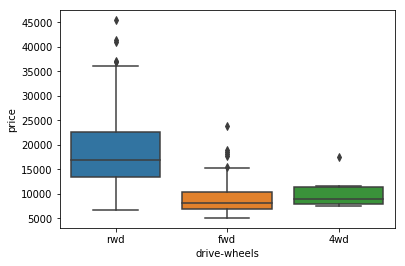

In [18]:
sns.boxplot(x="drive-wheels", y="price", data=df)

Contrast to "drive-wheels", the distributions of "price" between the different "body-style" categories have a overlapping.

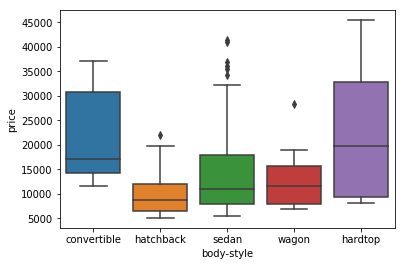

In [19]:
sns.boxplot(x="body-style", y="price", data=df)

We eliminate the variable "engine-location" as a potential predictor because only 3 cars with a rear engine while 198 with an engine in the front, creating a skewed result.

In [20]:
df["engine-location"].value_counts().to_frame()

,engine-location
front,198
rear,3


Therefore, we select N = {"wheel-base", "length", "width", "curb-weight", "engine-size", "bore", "horsepower", "city-mpg", "highway-mpg"} and C = {"drive-wheels"} as potential preditors of the car price.

## 4. Modeling and Evaluation 

We will use *multiple linear regression* as our model, rather than *simple linear regression* and *polynomial regression*.

### 4.1 Multiple linear regression VS polynomial regression

Without loss of generality, we can further refine our predictors from above selected features N such that each PCC is >0.7 or <-0.7. So, it is a set of "width", "curb-weight", "engine-size", "horsepower", "highway-mpg".

In [21]:
X = df[["width", "curb-weight", "engine-size", "horsepower", "highway-mpg"]]
y = df["price"]

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures # Convert polynomials of degree 2 or higher to a polynomial of degree 1.
from sklearn.pipeline import Pipeline # Simplify multiple steps.
from sklearn.preprocessing import StandardScaler # Normalize data.
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

R2 = []
MSE = []
Degree = range(1,5)

for n in Degree:
    Input = [('scale',StandardScaler()), ('polynomial', PolynomialFeatures(degree=n, include_bias=False)), ('model',LinearRegression())]
    pipe = Pipeline(Input)
    pipe.fit(X_train,y_train)
    yhat = pipe.predict(X_test)
    r2 = r2_score(y_test, yhat)
    mse = mean_squared_error(y_test, yhat)
    R2.append(r2)
    MSE.append(mse)

pd.DataFrame({"Degree":Degree, "R^2":R2, "MSE":MSE})

,Degree,R^2,MSE
0,1,7.609968e-01,2.048095e+07
1,2,6.248125e-01,3.215102e+07
2,3,-3.113041e+00,3.524597e+08
3,4,-9.650169e+07,8.269540e+15


In [22]:
print("From the above table, the best R-squared score is when the degree is", Degree[R2.index(max(R2))], ".")

From the above table, the best R-squared score is when the degree is 1 .


Therefore, the multiple linear regression is better than polynomial regression. Moreover, by using visualization, we also can evaluate the accuracy of the multiple linear regression.

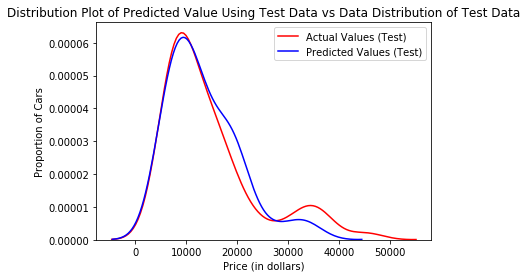

In [23]:
def DistributionPlot(RedFunction,BlueFunction,RedName,BlueName,Title ):
    width = 6
    height = 4
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

Input = [('scale',StandardScaler()), ('polynomial', PolynomialFeatures(degree=1, include_bias=False)), ('model',LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(X_train,y_train)
yhat = pipe.predict(X_test)

Title='Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat, "Actual Values (Test)", "Predicted Values (Test)", Title)    

The next result is calculated using *cross-validation* method. Note that cross-validation method usually can be applied when the data size of is small.

In [24]:
from sklearn.model_selection import cross_val_score # Cross-validation.

Rcross = cross_val_score(LinearRegression(), X, y, cv=4) # 4-fold cross-validation.
Rcross.mean()
MSEcross = -1*cross_val_score(LinearRegression(), X, y, cv=4, scoring='neg_mean_squared_error')
print("R^2 for Cross-validation =", Rcross.mean(), "\nMSE Cross-validation =", MSEcross.mean())

R^2 for Cross-validation = 0.6669083956908355 
MSE Cross-validation = 16213553.559318244


### 4.2 Multiple linear regression VS simple linear regression

As an illustration, we choose "engine-size" as the predictor for the simple linear regression.

In [25]:
X_1 = df[["engine-size"]]

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y, test_size=0.30, random_state=1)

lr = LinearRegression()

lr.fit(X_train_1,y_train_1)
yhat_1 = lr.predict(X_test_1)
print("R^2 =", r2_score(y_test_1, yhat_1), "\nMSE =", mean_squared_error(y_test_1, yhat_1))

R^2 = 0.6887892619732783 
MSE = 15446938.691334337


From the above scores, we can conclude that the multiple linear regression is better than simple linear regression. Moreover, the simple linear regression using "engine-size" is *not* a good model, as shown below.

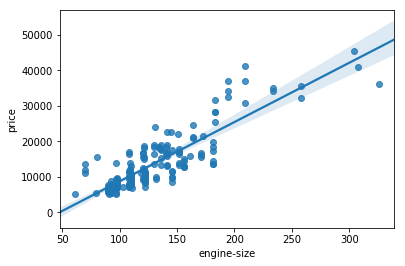

In [26]:
# Regression plot.

sns.regplot(x="engine-size", y="price", data=df)

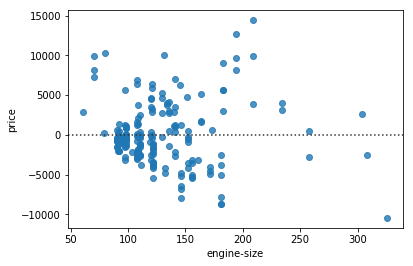

In [27]:
# Residual plot.

sns.residplot(x="engine-size", y="price", data=df)

Since the residuals are not randomly spread around the x-axis, the variance is *not* constant. Therefore, the simple linear regression using "engine-size" is *not* a good model.